# Project 1: Random Graphs and Random Walks

## Part 1 Generating Random Networks

### Question 1:
Create random networks using Erdo ̈s-R ́enyi (ER) model

1. Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [5]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

g1 = sample_gnp(n=1000, p=0.003, directed=F)
g2 = sample_gnp(n=1000, p=0.004, directed=F)
g3 = sample_gnp(n=1000, p=0.01, directed=F)
g4 = sample_gnp(n=1000, p=0.05, directed=F)
g5 = sample_gnp(n=1000, p=0.1, directed=F)

Mean is: 3.112 
Variance is: 3.168625 


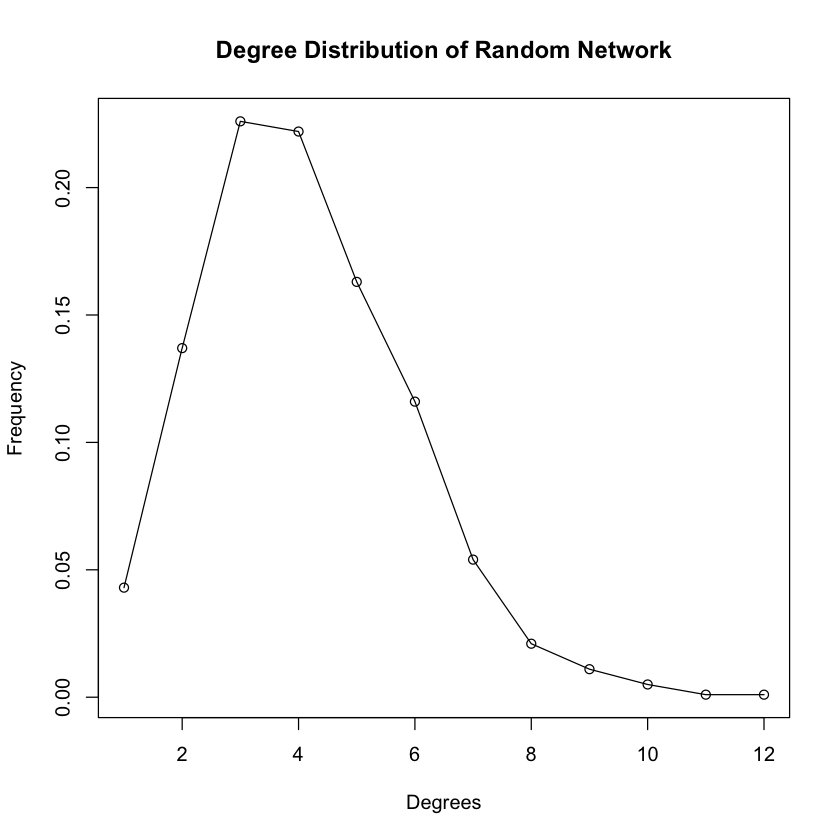

Mean is: 4.11 
Variance is: 3.993894 


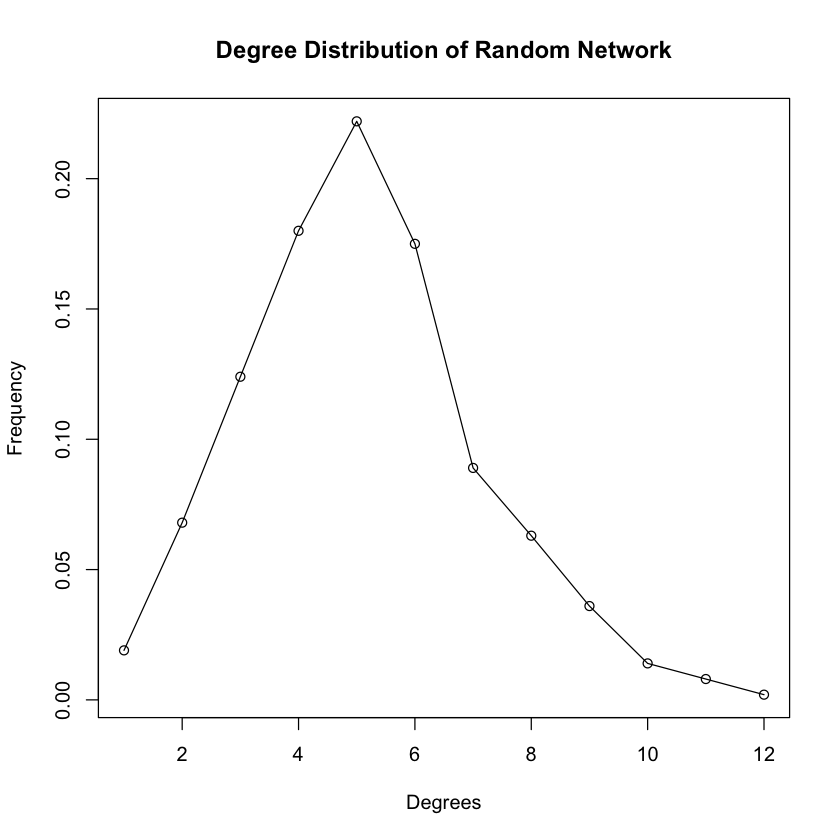

Mean is: 10.086 
Variance is: 10.12873 


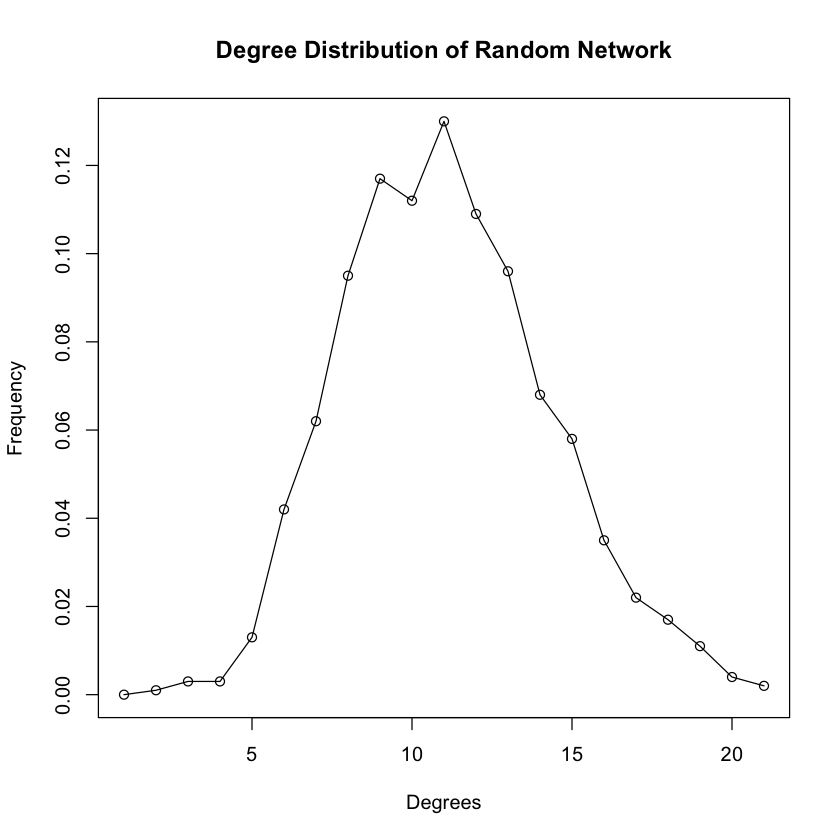

Mean is: 50.284 
Variance is: 45.97332 


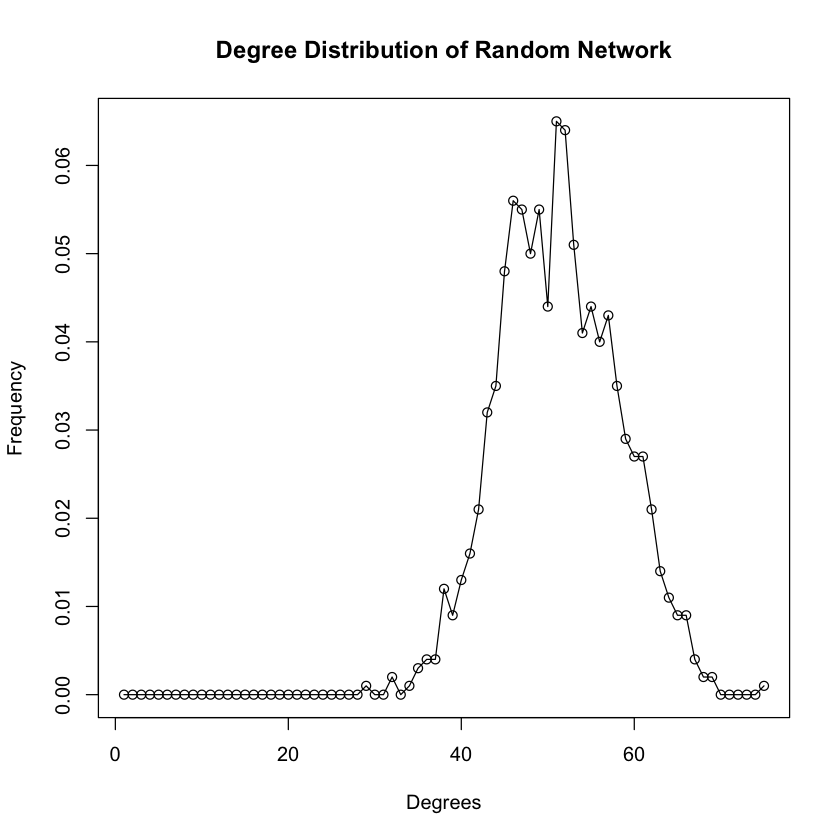

Mean is: 99.47 
Variance is: 80.56366 


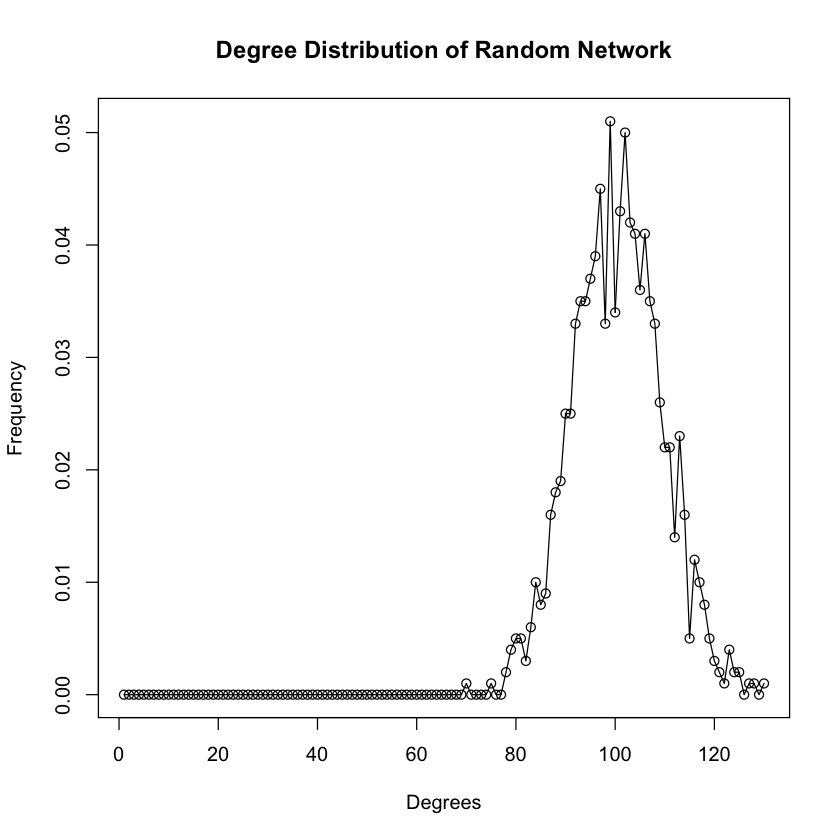

In [14]:
# show the degree distribution and get mean and variance
for (g in list(g1, g2, g3, g4, g5)){
    plot(degree_distribution(g), main = 'Degree Distribution of Random Network', 
         xlab = 'Degrees', ylab = 'Frequency')
    lines(degree_distribution(g))
    cat("Mean is:", mean(degree(g)),"\n", sep=" ")
    cat("Variance is:", var(degree(g)),"\n", sep=" ")
}

2. For each p and n = 1000, answer the following questions: <br>
Are all random realizations of the ER network connected? Numerically estimate the probability that a generated network is connected. For one instance of the networks with that p, find the giant connected component (GCC) if not connected. What is the diameter of the GCC?

-------------------- g1 --------------------
P of the graph is: 0.003 
Is connected? FALSE 
The diameter of the gcc is: 15 
The total diameter of the graph is: 15 
-------------------- g2 --------------------
P of the graph is: 0.004 
Is connected? FALSE 
The diameter of the gcc is: 11 


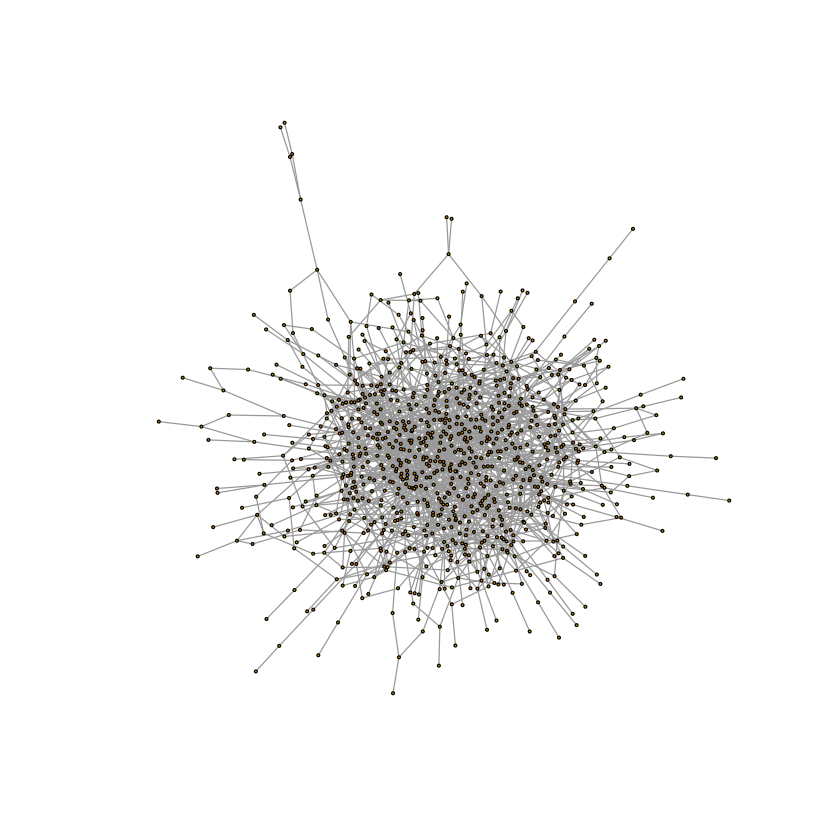

The total diameter of the graph is: 11 
-------------------- g3 --------------------
P of the graph is: 0.01 
Is connected? TRUE 
The total diameter of the graph is: 6 
-------------------- g4 --------------------
P of the graph is: 0.05 
Is connected? TRUE 
The total diameter of the graph is: 3 
-------------------- g5 --------------------
P of the graph is: 0.1 
Is connected? TRUE 
The total diameter of the graph is: 3 


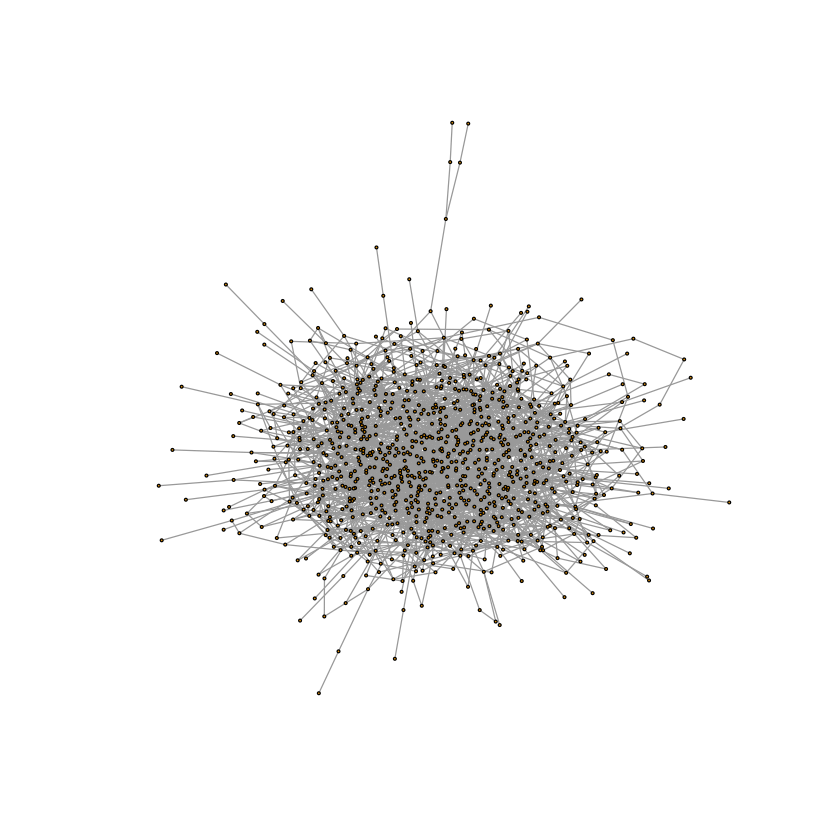

In [24]:
i <- 0
for (g in list(g1, g2, g3, g4, g5)){
    i <- i+1
    cat('-------------------- ', 'g', i, ' --------------------', '\n', sep="")
    cat('P of the graph is:', g$p, '\n', sep=" ")
    cat('Is connected?', is_connected(g), '\n', sep=" ")
    if (!is_connected(g)){
        g.components <- clusters(g)
        idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == idx))
        cat('The diameter of the gcc is:', diameter(gcc), '\n', sep=" ")
        plot(gcc, vertex.size=1, vertex.label=NA)
    }
    cat('The total diameter of the graph is:', diameter(g), '\n')
}

3. It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of the total network size) is a highly nonlinear function of p, with interesting properties occurring for values where $p = O(\frac{1}{n})$ and $p = O(\frac{ln(n)}{n})$. For n = 1000, sweep over values of p from 0 to a $p_{max}$ that makes the network almost surely connected and create 100 random networks for each p. pmax should be roughly determined by yourself. Then scatter plot the normalized GCC sizes vs p. Plot a line of the average normalized GCC sizes for each p along with the scatter plot.
    - Empirically estimate the value of p where a giant connected component starts to emerge (define your criterion of “emergence”)? Do they match with theoretical values mentioned or derived in lectures?
    - Empirically estimate the value of p where the giant connected component takes up over 99% of the nodes in almost every experiment.

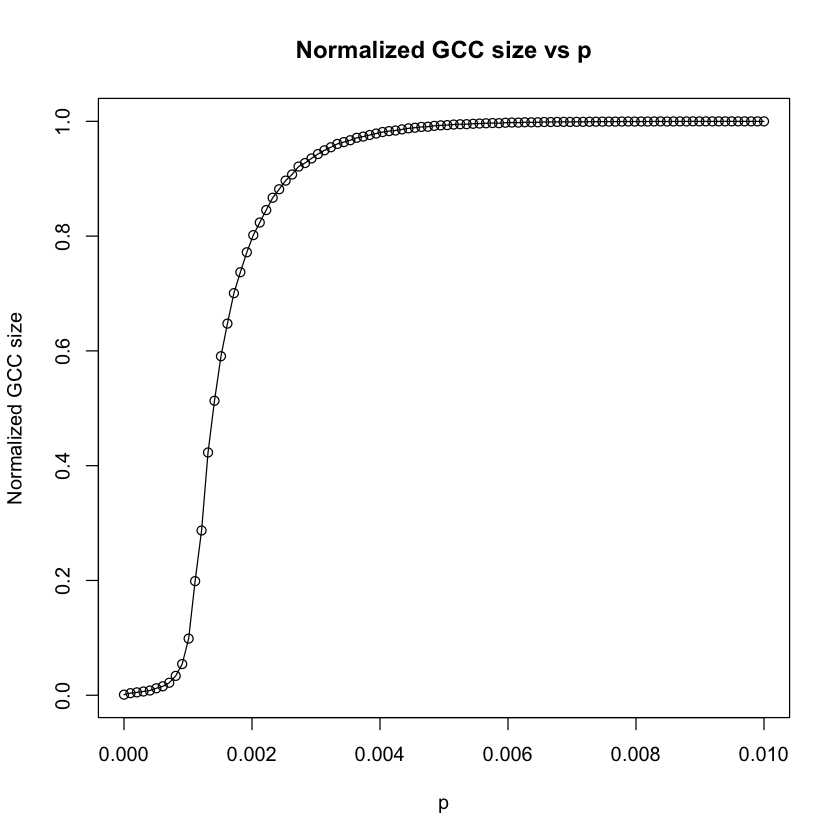

In [13]:
# try sweep p from 0 to 0.01(p_max)
pi <- seq(from = 0, to = 0.01, length.out = 100)
all_norm <- vector()
for (p in pi){
    gcc_norm <- 0
    for (i in 1:100){
        g = sample_gnp(n=1000, p=p, directed=F)
        g.components <- clusters(g)
        idx <- max(g.components$csize)
        gcc_norm <- gcc_norm + idx
    }
    gcc_norm <- gcc_norm/(100000)
    all_norm <- c(all_norm, gcc_norm)
}

# show the plot of gcc_norm vs pi
plot(pi, all_norm, main='Normalized GCC size vs p', xlab = 'p', ylab = 'Normalized GCC size')
lines(pi, all_norm)

4. i. Define the average degree of nodes c = n × p = 0.5. Sweep over the number of nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities p = c/n, as a function of n. What trend is observed?

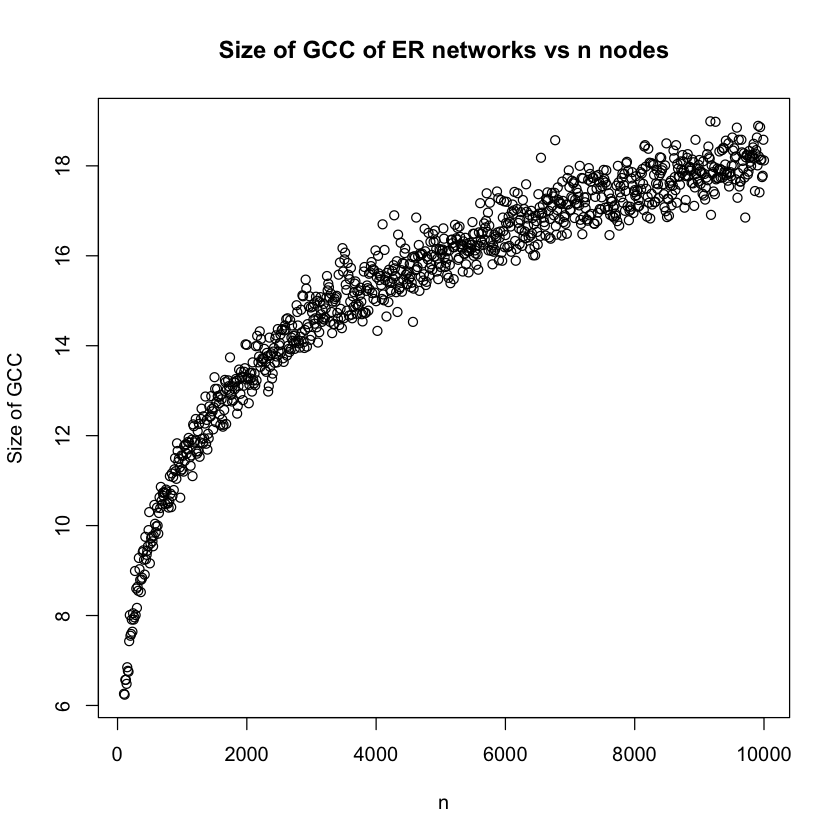

In [3]:
n <- seq(from = 100, to = 10000, by = 20)
size <- vector()
for (ni in n){
    pi <- 0.5/ni
    idx <- 0
    for (i in 1:100){
        g = erdos.renyi.game(ni, p=pi, type = 'gnp', directed = F)
        g.components <- clusters(g)
        idx <- max(g.components$csize)+idx
    }
    size <- c(size, idx/100)
}
plot(n, size, main='Size of GCC of ER networks vs n nodes', xlab = 'n', ylab = 'Size of GCC')

4. ii. Repeat the same for c = 1.

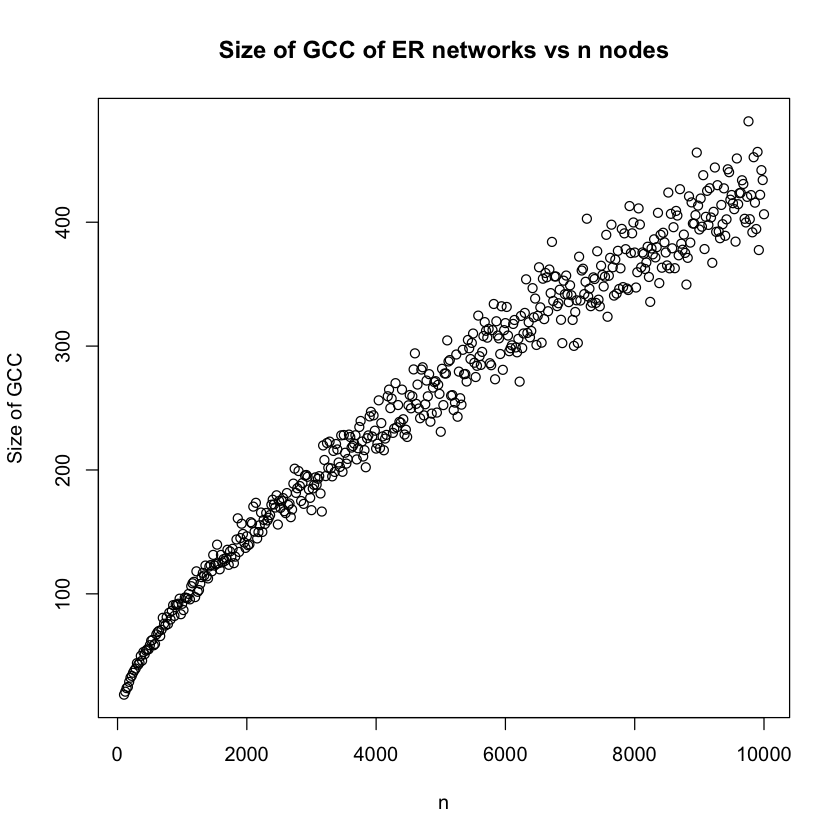

In [6]:
n <- seq(from = 100, to = 10000, by = 20)
size <- vector()
for (ni in n){
    pi <- 1/ni
    idx <- 0
    for (i in 1:100){
        g = erdos.renyi.game(ni, p=pi, type = 'gnp', directed = F)
        g.components <- clusters(g)
        idx <- max(g.components$csize)+idx
    }
    size <- c(size, idx/100)
}
plot(n, size, main='Size of GCC of ER networks vs n nodes', xlab = 'n', ylab = 'Size of GCC')

4. iii. Repeat the same for values of c = 1.1,1.2,1.3, and show the results for these
three values in a single plot.

In [9]:
Get_size = function(c){
    n <- seq(from = 100, to = 10000, by = 20)
    size <- vector()
    for (ni in n){
        pi <- c/ni
        idx <- 0
        for (i in 1:100){
            g = erdos.renyi.game(ni, p=pi, type = 'gnp', directed = F)
            g.components <- clusters(g)
            idx <- max(g.components$csize)+idx
        }
        size <- c(size, idx/100)
    }
    return(size)
}

In [10]:
library('ggplot2')

size1 = Get_size(1.1)
size2 = Get_size(1.2)
size3 = Get_size(1.3)

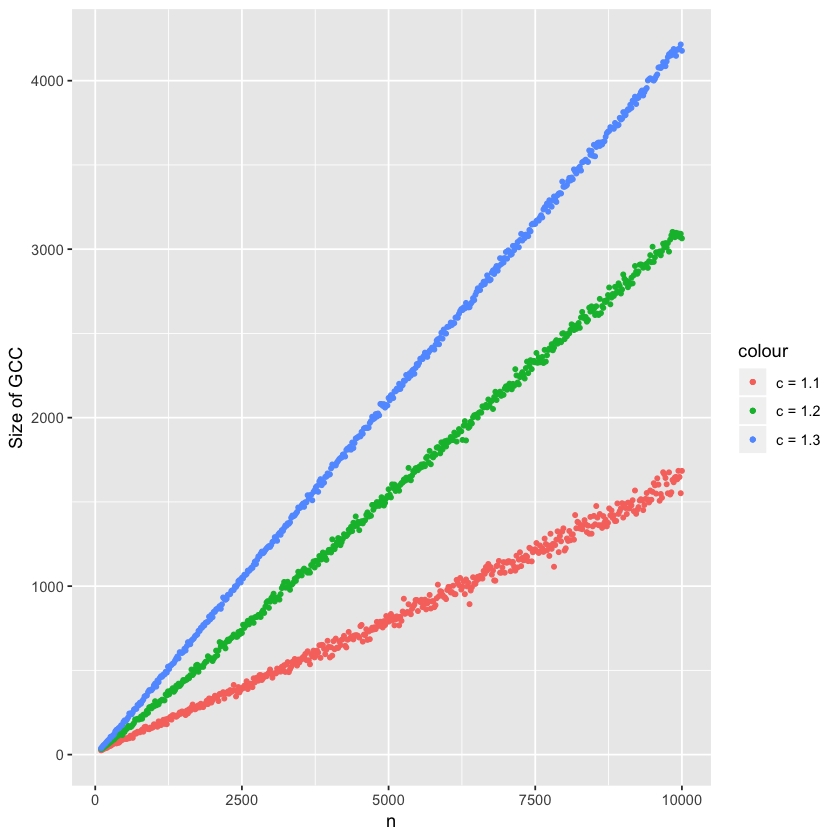

In [14]:
# show time
n <- seq(100, 10000, 20)
params <- data.frame(n, size1, size2, size3)
ggplot()+geom_point(data = params,aes(x = n,y = size1,colour = "c = 1.1"),size=1)+
geom_point(data = params,aes(x = n,y = size2, colour ="c = 1.2"), size=1)+
geom_point(data = params,aes(x = n,y = size3, colour ="c = 1.3" ), size=1)+ 
xlab("n")+ylab("Size of GCC")

4. iv. What is the relation between the expected GCC size and n in each case?

## Question 2:
Create networks using preferential attachment model

1. Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?
Hint Useful function(s): `sample_pa` ( `barabasi.game` )

In [15]:
g <- barabasi.game(n = 1000, m = 1, directed = F)
cat("Is connected?", is_connected(g))

Is connected? TRUE

2. Use fast greedy method to find the community structure. Measure modularity. 

Hint Useful function(s): `cluster_fast_greedy` , `modularity`

The modularity is: 0.9326844 
Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
45 42 44 44 39 38 39 49 33 33 31 31 29 29 29 28 29 28 28 25 23 22 22 21 20 21 
27 28 29 30 31 32 33 34 35 36 37 
23 18 19 19 16 15 15 14 13 14 12 


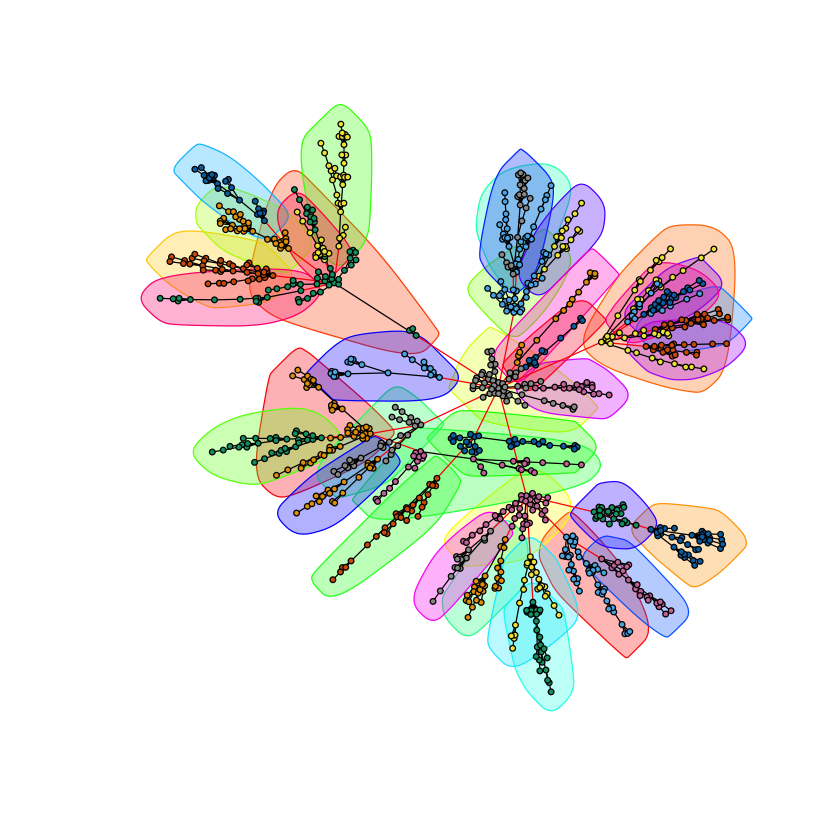

In [25]:
clusters <- cluster_fast_greedy(g)
cat("The modularity is:", modularity(clusters), "\n")

g <- set.graph.attribute(g, "layout", layout.fruchterman.reingold(g))
plot(clusters, g, vertex.label="", vertex.size=2)

csizes <- sizes(clusters)
print(csizes)

3. Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

In [28]:
g_big <- barabasi.game(n = 10000, m = 1, directed = F)
cat("Is connected?", is_connected(g_big), "\n")

clusters_big <- cluster_fast_greedy(g_big)
cat("The modularity is:", modularity(clusters_big), "\n")

Is connected? TRUE 
The modularity is: 0.9783202 


4. Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot using linear regression.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“12 y values <= 0 omitted from logarithmic plot”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“33 y values <= 0 omitted from logarithmic plot”

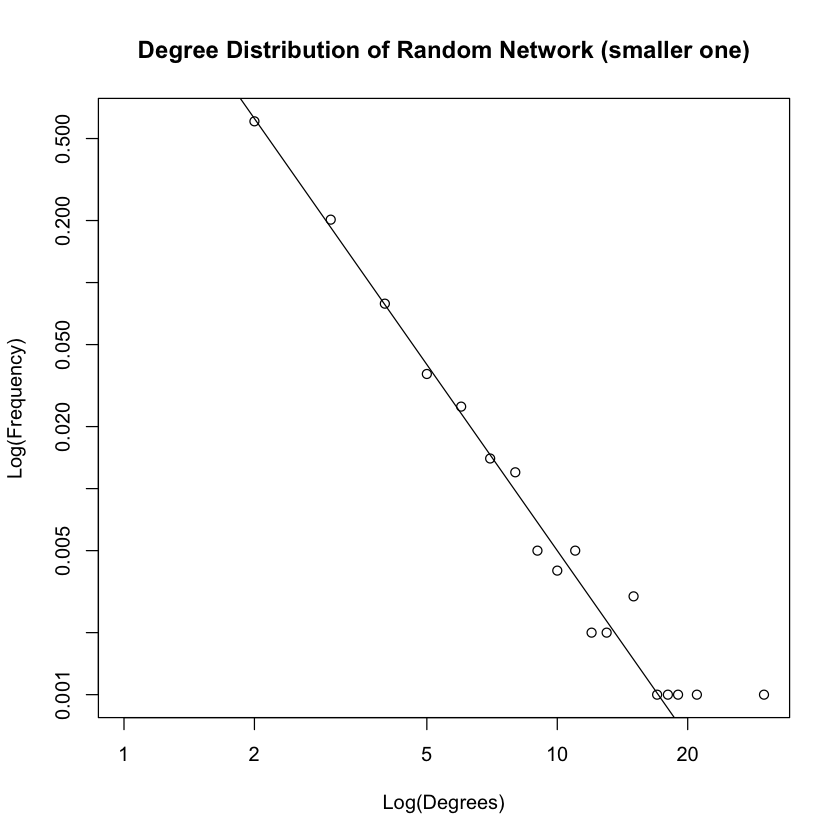

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”

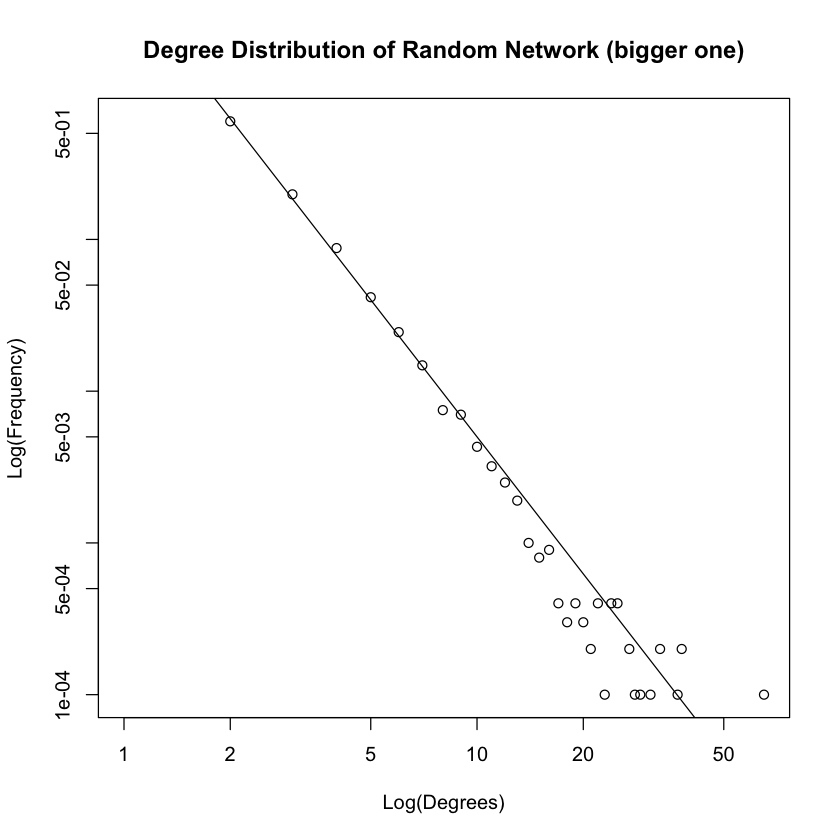

In [39]:
g_dd <- degree_distribution(g)
g_big_dd <- degree_distribution(g_big)
plot(g_dd, main = 'Degree Distribution of Random Network (smaller one)', 
         xlab = 'Log(Degrees)', ylab = 'Log(Frequency)', log = "xy")
lines(seq(1, length(g_dd)), 5*seq(1, length(g_dd))^(-3), log='xy')
plot(g_big_dd, main = 'Degree Distribution of Random Network (bigger one)',
    xlab = 'Log(Degrees)', ylab = 'Log(Frequency)', log = "xy")
lines(seq(1, length(g_big_dd)), 5*seq(1, length(g_big_dd))^(-3), log='xy')

5. In the two networks generated in 2(d), perform the following:
Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

Hint Useful function(s): `sample`

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“17 x values <= 0 omitted from logarithmic plot”

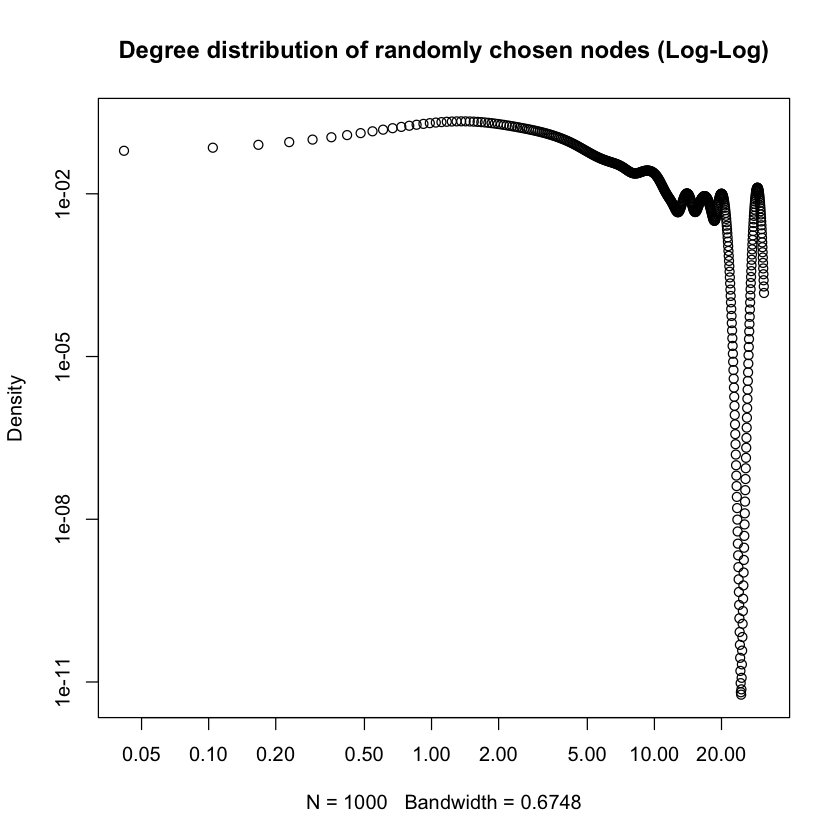

In [51]:
degree_all <- vector()
for (i in 1:1000){
    vi <- sample(V(g), 1)
    v_neighbors <- neighbors(g, v=vi)
    vj <- sample(v_neighbors, 1)
    degree_all <- c(degree_all, degree(g, vj))
}
plot(density(degree_all), type = "p", main = "Degree distribution of randomly chosen nodes (Log-Log)", log = "xy")

6. Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

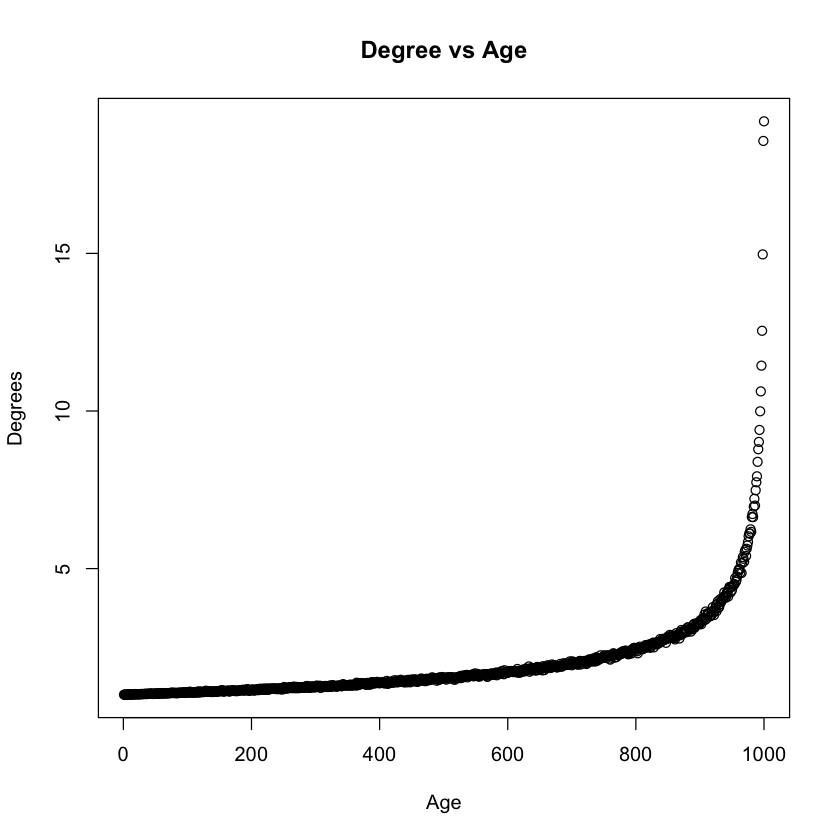

In [56]:
degree_avg <- rep(0, 1000)
for (i in 1:1000){
    gi <- barabasi.game(1000, m = 1, directed = F)
    degree_avg <- degree_avg + degree(gi)
}
plot(rev(degree_avg/1000), main = "Degree vs Age", xlab = "Age", ylab = "Degrees")

7. Repeat the previous parts for m = 2, and m = 5. Why was modularity for m = 1 high? TODO: Specify which part to repeat to reduce repetition? Only repeat the modularity part maybe?

In [59]:
gm1 <- barabasi.game(1000, m=1, directed = F)
gm2 <- barabasi.game(1000, m=2, directed = F)
gm5 <- barabasi.game(1000, m=5, directed = F)

cat('--------------------', "m = 1", "---------------------", "\n")
cat("Is connected?", is_connected(gm1), "\n")
clusters_m1 <- cluster_fast_greedy(gm1)
cat("The modularity is:", modularity(clusters_m1), "\n")

cat('--------------------', "m = 2", "---------------------", "\n")
cat("Is connected?", is_connected(gm2), "\n")
clusters_m2 <- cluster_fast_greedy(gm2)
cat("The modularity is:", modularity(clusters_m2), "\n")

cat('--------------------', "m = 3", "---------------------", "\n")
cat("Is connected?", is_connected(gm5), "\n")
clusters_m5 <- cluster_fast_greedy(gm5)
cat("The modularity is:", modularity(clusters_m5), "\n")

-------------------- m = 1 --------------------- 
Is connected? TRUE 
The modularity is: 0.9335627 
-------------------- m = 2 --------------------- 
Is connected? TRUE 
The modularity is: 0.5244584 
-------------------- m = 3 --------------------- 
Is connected? TRUE 
The modularity is: 0.2769819 


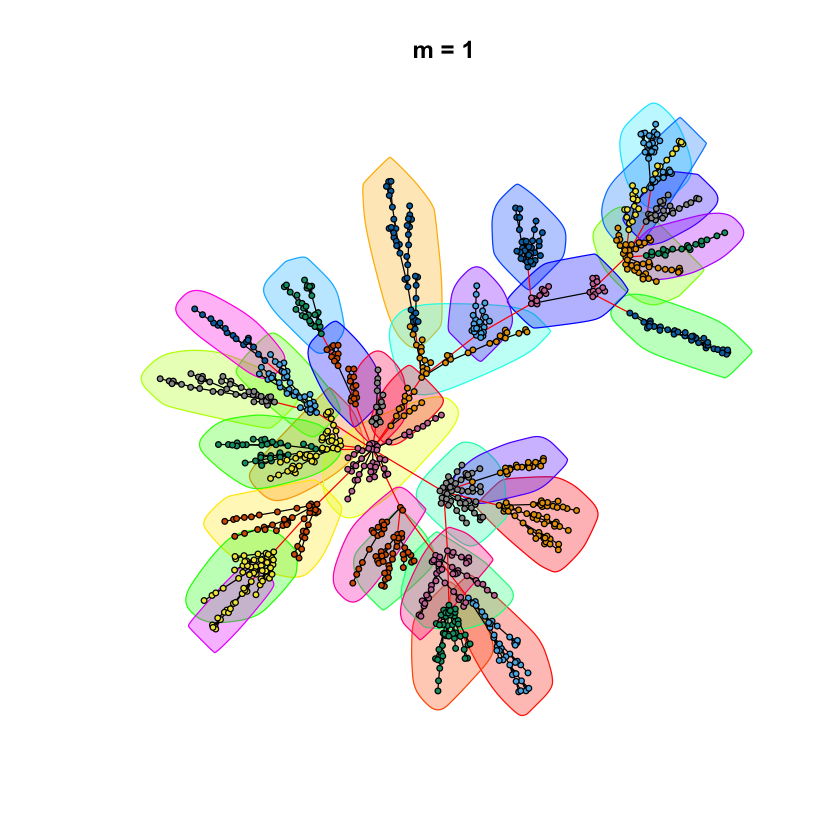

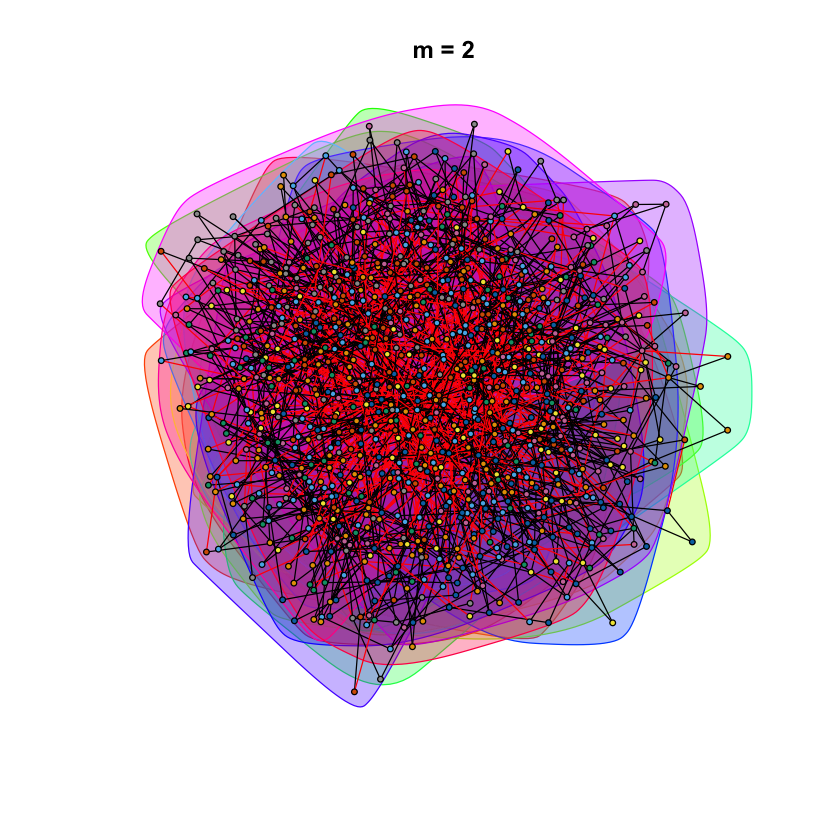

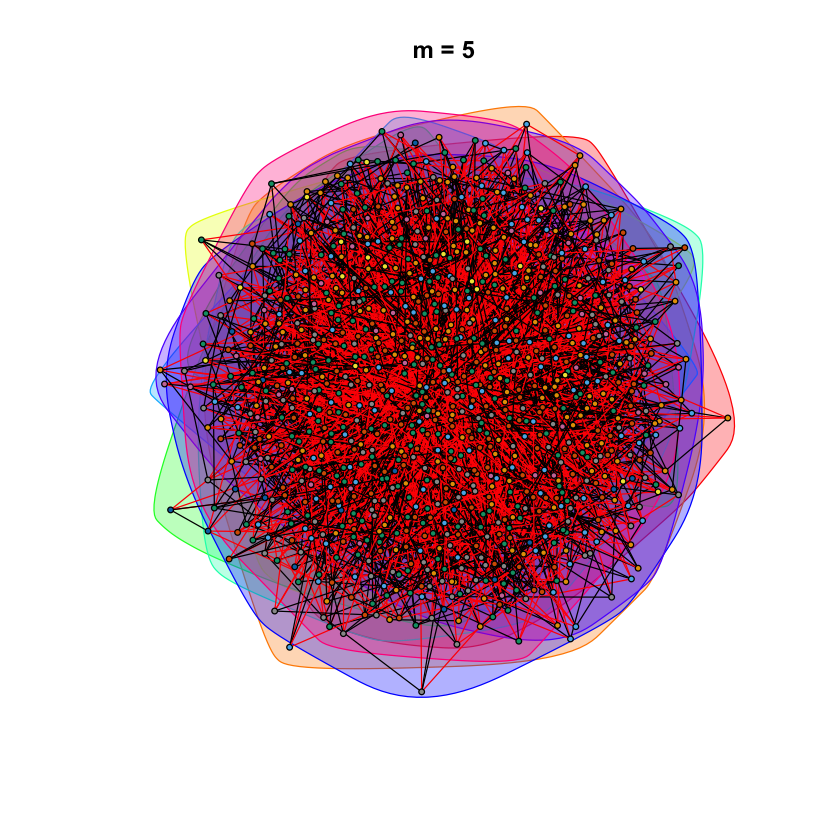

In [62]:
# Visualize the networks of m=2, 5
gm1 <- set.graph.attribute(gm1, "layout", layout.fruchterman.reingold(gm1))
plot(clusters_m1, gm1, vertex.label="", vertex.size=2, main="m = 1")
gm2 <- set.graph.attribute(gm2, "layout", layout.fruchterman.reingold(gm2))
plot(clusters_m2, gm2, vertex.label="", vertex.size=2, main="m = 2")
gm5 <- set.graph.attribute(gm5, "layout", layout.fruchterman.reingold(gm5))
plot(clusters_m5, gm5, vertex.label="", vertex.size=2, main="m = 5")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“6 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“37 y values <= 0 omitted from logarithmic plot”

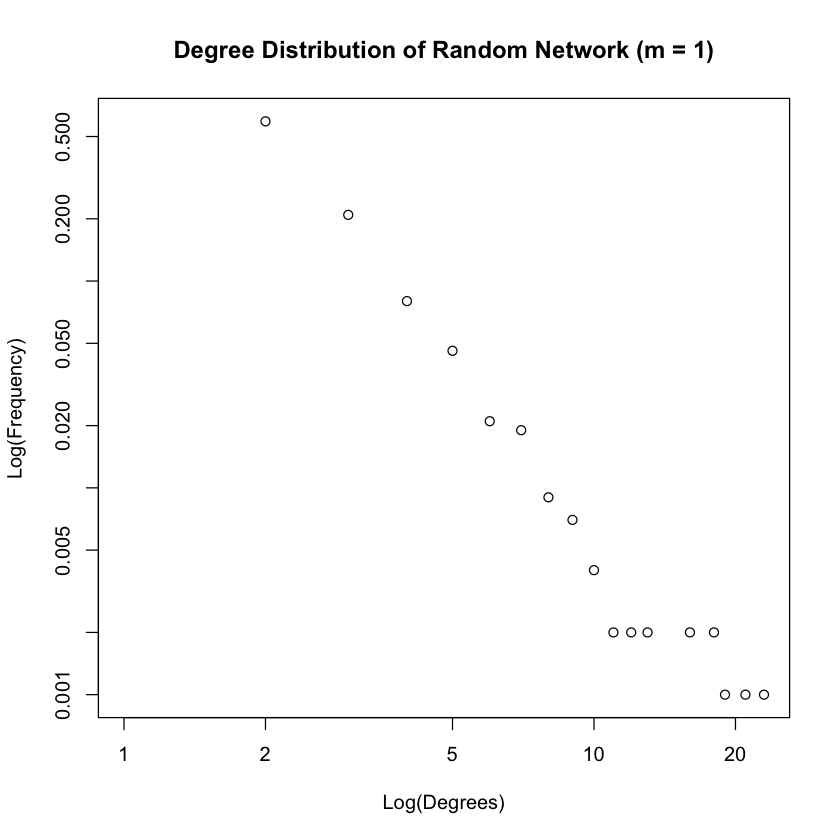

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“66 y values <= 0 omitted from logarithmic plot”

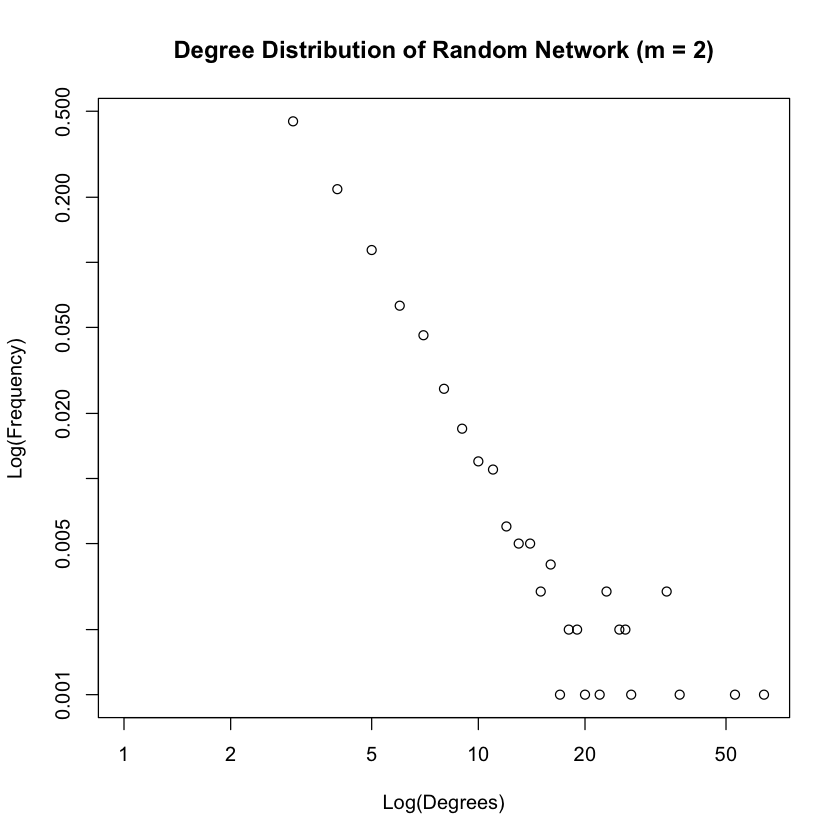

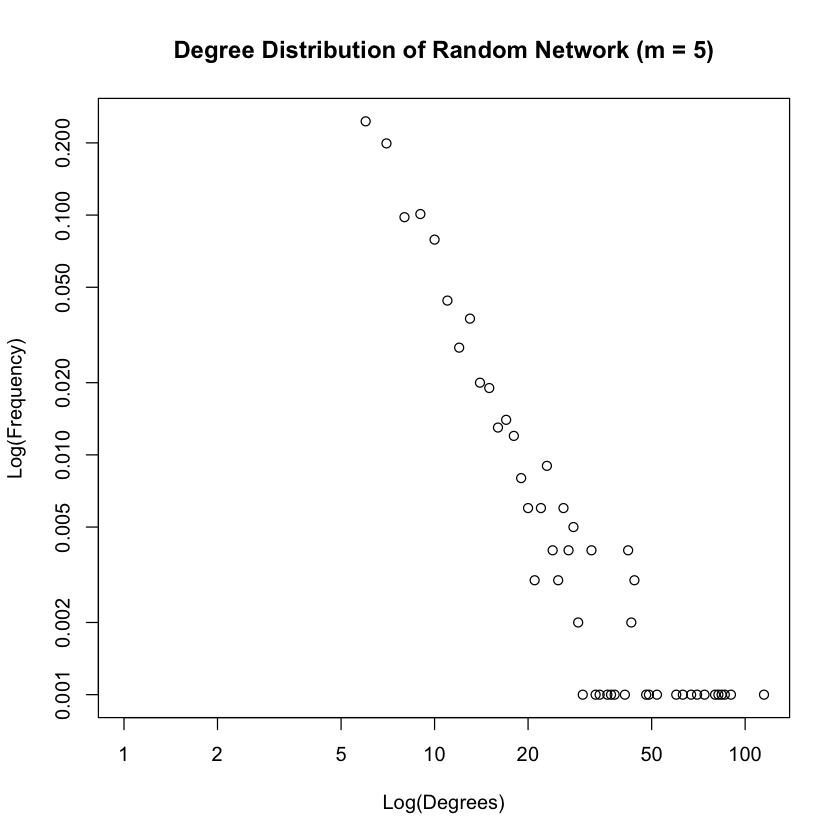

In [63]:
# Plot degree distribution in Log-Log plot
g_dd_m1 <- degree_distribution(gm1)
g_dd_m2 <- degree_distribution(gm2)
g_dd_m5 <- degree_distribution(gm5)
plot(g_dd_m1, main = 'Degree Distribution of Random Network (m = 1)', 
         xlab = 'Log(Degrees)', ylab = 'Log(Frequency)', log = "xy")
plot(g_dd_m2, main = 'Degree Distribution of Random Network (m = 2)',
    xlab = 'Log(Degrees)', ylab = 'Log(Frequency)', log = "xy")
plot(g_dd_m5, main = 'Degree Distribution of Random Network (m = 5)',
    xlab = 'Log(Degrees)', ylab = 'Log(Frequency)', log = "xy")

8. Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

Hint In case that fastgreedy community detection fails because of self-loops, you may use “walktrap” community detection.

Useful function(s): `sample_degseq`

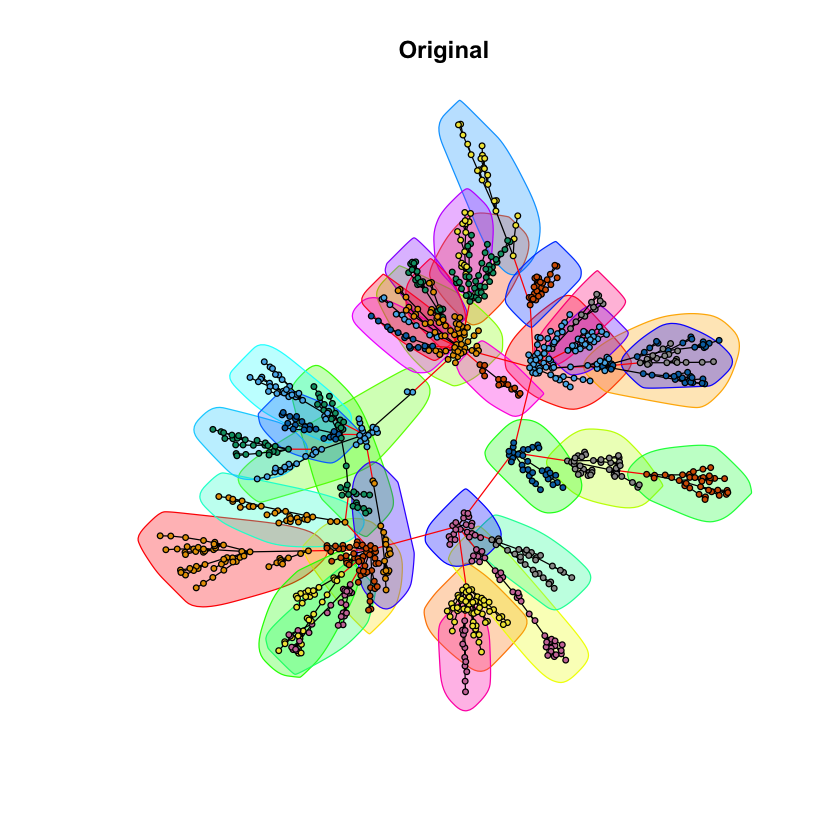

The modularity of the original one is: 0.9308032 
The modularity of the new network created by stub-matching is: 0.847405 


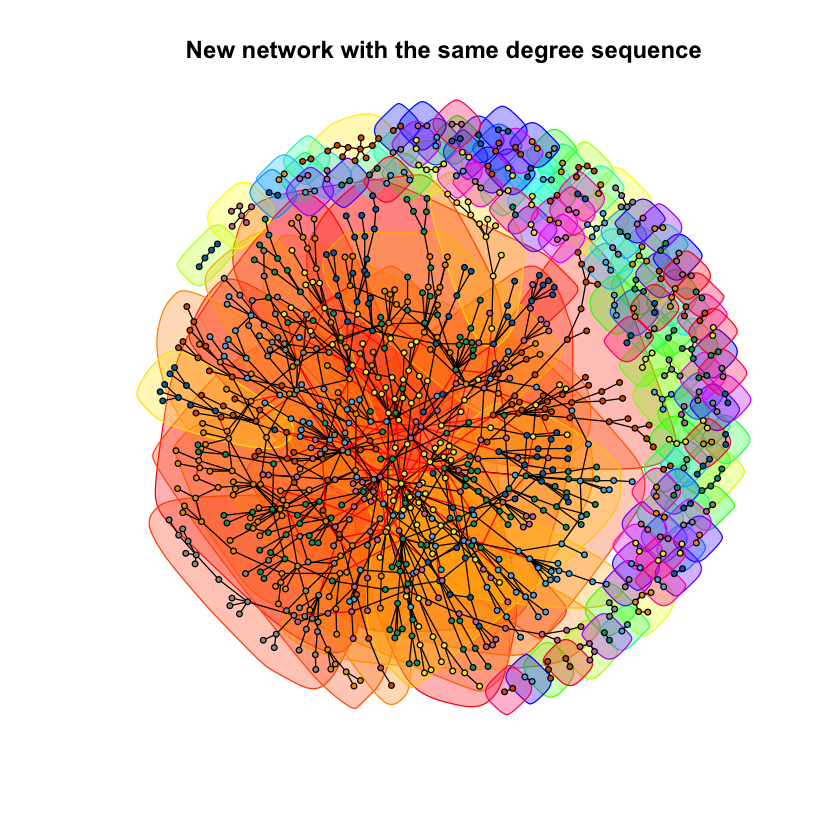

In [67]:
# Generate 2 networks
g1 <- barabasi.game(1000, m = 1, directed = F)
degree_g1 <- degree(g1)
g2 <- sample_degseq(degree_g1, method = "simple.no.multiple")

# plot communities
g1 <- set.graph.attribute(g1, "layout", layout.fruchterman.reingold(g1))
clusters1 <- cluster_fast_greedy(g1)
plot(clusters1, g1, vertex.label="", vertex.size=2, main="Original")

g2 <- set.graph.attribute(g2, "layout", layout.fruchterman.reingold(g2))
clusters2 <- cluster_fast_greedy(g2)
plot(clusters2, g2, vertex.label="", vertex.size=2, main="New network with the same degree sequence")

# Calculate modularity
cat("The modularity of the original one is:", modularity(clusters1), "\n")
cat("The modularity of the new network created by stub-matching is:", modularity(clusters2), "\n")

## Question 3:
 Create a modified preferential attachment model that penalizes the age of a node

1. Each time a new vertex is added, it creates m links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. In particular, the probability that a newly added vertex connects to an old vertex is proportional to:
$$P[i] \sim (ck_i^{\alpha} + a)(dl_i^{\beta} + b)$$

where $k_i$ is the degree of vertex i in the current time step, and $l_i$ is the age of vertex i. Produce such an undirected network with 1000 nodes and parameters m = 1, α=1,β=−1,and a=c=d=1,b=0. Plot the degree distribution. What is the power law exponent?

Hint Useful function(s): `sample_pa_age`

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“3 y values <= 0 omitted from logarithmic plot”

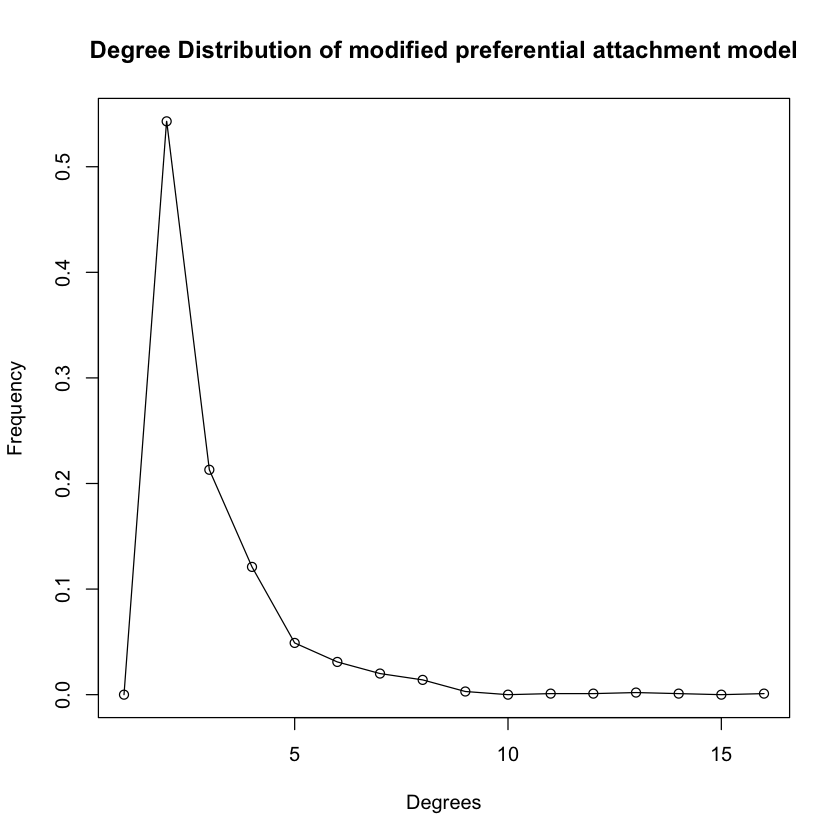

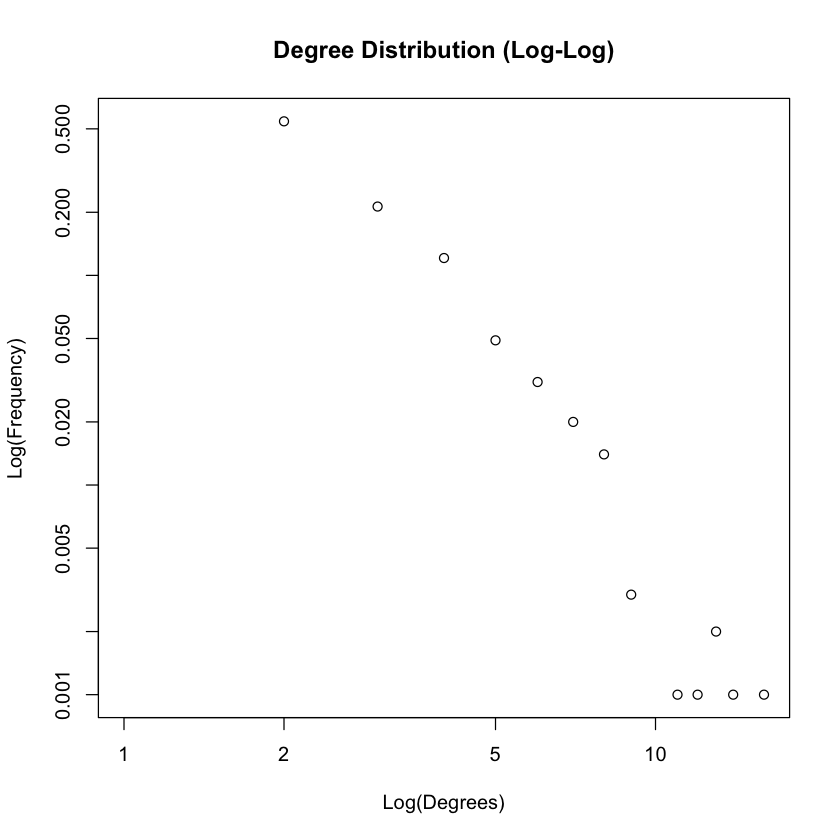

In [71]:
g <- sample_pa_age(1000, m = 1, aging.exp = -1, pa.exp = 1, directed = F)
plot(degree_distribution(g), main = "Degree Distribution of modified preferential attachment model",
    xlab = "Degrees", ylab = "Frequency")
lines(degree_distribution(g))
plot(degree_distribution(g), main = "Degree Distribution (Log-Log)",
    xlab = "Log(Degrees)", ylab = "Log(Frequency)", log = "xy")

2. Use fast greedy method to find the community structure. What is the modularity?

The modularity is: 0.9356679 
Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
45 42 44 44 39 38 39 49 33 33 31 31 29 29 29 28 29 28 28 25 23 22 22 21 20 21 
27 28 29 30 31 32 33 34 35 36 37 
23 18 19 19 16 15 15 14 13 14 12 


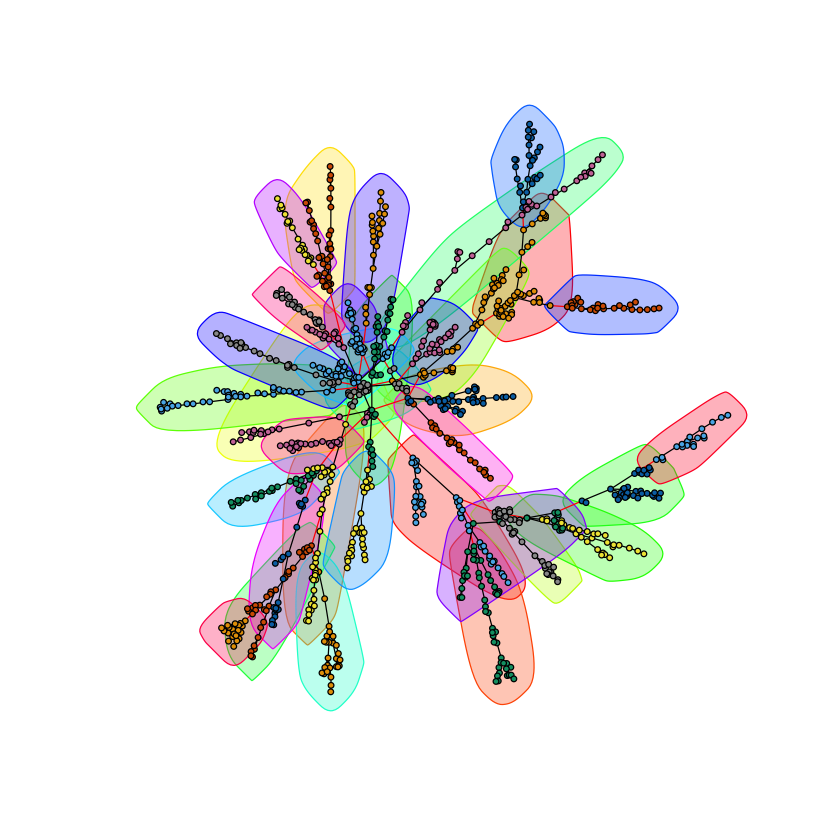

In [72]:
clusters_g <- cluster_fast_greedy(g)
cat("The modularity is:", modularity(clusters_g), "\n")

g <- set.graph.attribute(g, "layout", layout.fruchterman.reingold(g))
plot(clusters_g, g, vertex.label="", vertex.size=2)

csizes <- sizes(clusters)
print(csizes)

## Part 2 Random Walk on Networks

### Question 3:

PageRank

The PageRank algorithm, as used by the Google search engine, exploits the linkage structure of the web to compute global "importance" scores that can be used to influence the ranking of search results. Here, we use random walk to simulate PageRank.

1. We are going to create a directed random network with 1000 nodes, using the preferential attachment model. Note that in a directed preferential attachment network, the out-degree of every node is m, while the in-degrees follow a power law distribution. One problem of performing random walk in such a network is that, the very first node will have no outbounding edges, and be a "black hole" which a random walker can never "escape" from. To address that, let's generate another 1000-node random network with preferential attachment model, and merge the two networks by adding the edges of the second graph to the first graph with a shuffling of the indices of the nodes.  
   Create such a network using m = 4. Measure the probability that the walker visits each node. Is this probability related to the degree of the nodes?

In [5]:
if (!require("igraph")) install.packages("igraph")
library("igraph")

In [18]:
g_3a_first <- barabasi.game(n = 1000, m = 4, directed = T)
g_3a_second <- barabasi.game(n = 1000, m = 4, directed = T)

cat("# vertices of first graph:", vcount(g_3a_first), "\n", sep=" ")
cat("# edges of first graph:", ecount(g_3a_first), "\n", sep=" ")
cat("# vertices of second graph:", vcount(g_3a_second), "\n", sep=" ")
cat("# edges of second graph:", ecount(g_3a_second), "\n", sep=" ")

# vertices of first graph: 1000 
# edges of first graph: 3990 
# vertices of second graph: 1000 
# edges of second graph: 3990 


In [33]:
g_3a_second_p <- permute(g_3a_second, sample(vcount(g_3a_second)))
edge_list <- as_edgelist(g_3a_second_p)

# convert 2-d array to 1-d
edges <- 1 : length(edge_list)
for(i in 1:length(edges)) {
    col <- (i + 1) %% 2 + 1
    row <- floor((i + 1) / 2)
    edges[i] = edge_list[row, col]
}

g_merge <- add_edges(g_3a_first, edges)

In [34]:
is.connected(g_merge)
cat("# vertices of merged graph:", vcount(g_merge), "\n", sep=" ")
cat("# edges of merged graph:", ecount(g_merge), "\n", sep=" ")

[1] TRUE

# vertices of merged graph: 1000 
# edges of merged graph: 7980 


In [35]:
library('pracma')
create_transition_matrix = function(g) {
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(array(adj, dim=c(nrow(adj), nrow(adj)))) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(array(adj, dim=c(nrow(adj), nrow(adj))), , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [37]:
transition_matrix = create_transition_matrix(g_merge)
pr_end_a = rep(0, 1000)
num_steps = 100

for(start_node in 1:1000) {
    next_node = start_node
    for(i in 1:num_steps) {
        PMF = transition_matrix[start_node, ]
        next_node = sample(1:vcount(g_merge), 1, prob = PMF)
        start_node = next_node
    }
    pr_end_a[next_node] = pr_end_a[next_node] + 1
}

pr_end_a = pr_end_a / 1000

In [38]:
print(pr_end_a)

   [1] 0.060 0.079 0.049 0.016 0.000 0.045 0.016 0.009 0.015 0.002 0.000 0.004
  [13] 0.014 0.002 0.002 0.000 0.003 0.000 0.000 0.000 0.001 0.023 0.000 0.003
  [25] 0.001 0.007 0.000 0.000 0.001 0.000 0.001 0.001 0.000 0.003 0.000 0.001
  [37] 0.000 0.010 0.000 0.001 0.001 0.000 0.000 0.003 0.002 0.000 0.000 0.000
  [49] 0.000 0.000 0.002 0.000 0.002 0.000 0.004 0.002 0.001 0.000 0.000 0.000
  [61] 0.001 0.007 0.000 0.005 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.019
  [73] 0.004 0.000 0.000 0.000 0.000 0.001 0.002 0.000 0.000 0.000 0.001 0.002
  [85] 0.000 0.000 0.000 0.001 0.002 0.000 0.000 0.000 0.001 0.000 0.000 0.000
  [97] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.005 0.000 0.000
 [109] 0.000 0.000 0.000 0.007 0.000 0.000 0.018 0.000 0.000 0.001 0.000 0.000
 [121] 0.006 0.000 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [133] 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.009 0.000 0.000 0.000 0.000 0.000 0.0

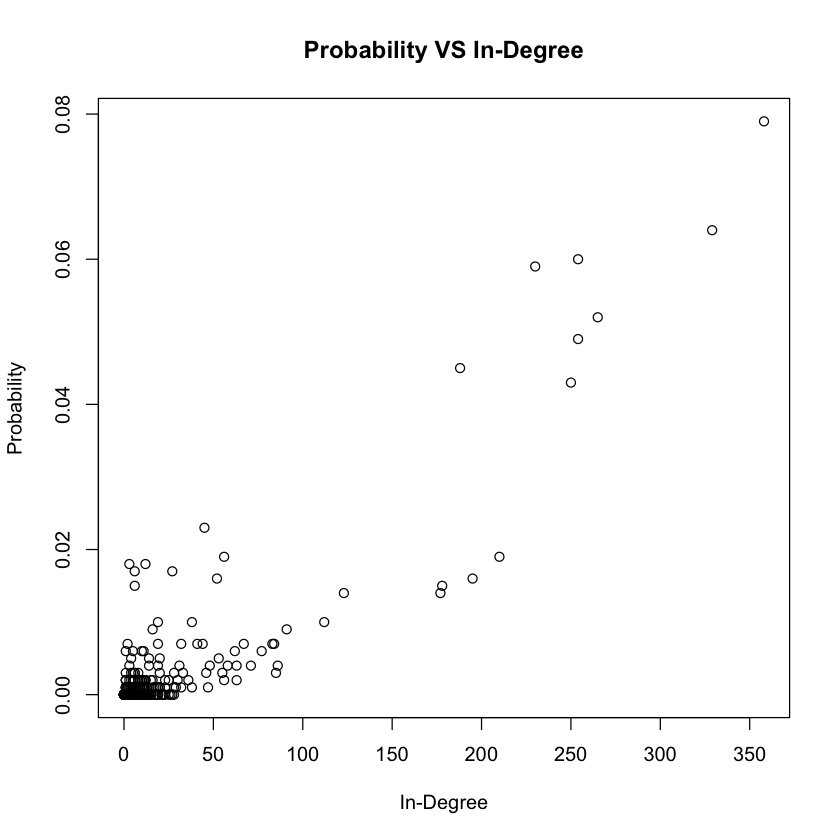

In [39]:
plot(degree(g_merge, mode = 'in'), 
     pr_end_a,
     main = 'Probability VS In-Degree',
     xlab = 'In-Degree',
     ylab = 'Probability')

2. In all previous questions, we didn't have any teleportation. Now, we use a teleportation probability of $\alpha$ = 0.15. By performing random walks on the network created in 3(a), measure the probability that the walker visits each node. Is this probability related to the degree of the node?

In [42]:
pr_end_b = rep(0, 1000)
num_steps = 100
alpha = 0.15

for(start_node in 1:1000) {
    next_node = start_node
    for(i in 1:num_steps) {
        PMF = transition_matrix[start_node, ]
        rd = runif(1)
        if(rd < alpha) { # teleportation
            next_node = sample(1:vcount(g_merge), 1, prob = NULL)
        } else {
            next_node = sample(1:vcount(g_merge), 1, prob = PMF)
        }
        start_node = next_node
    }
    pr_end_b[next_node] = pr_end_b[next_node] + 1
}

pr_end_b = pr_end_b / 1000

In [43]:
print(pr_end_b)

   [1] 0.051 0.060 0.031 0.012 0.000 0.024 0.018 0.012 0.015 0.001 0.001 0.005
  [13] 0.012 0.000 0.005 0.000 0.007 0.002 0.000 0.000 0.002 0.013 0.000 0.005
  [25] 0.001 0.003 0.000 0.000 0.001 0.001 0.000 0.001 0.000 0.002 0.002 0.003
  [37] 0.002 0.012 0.000 0.002 0.002 0.000 0.000 0.000 0.000 0.000 0.002 0.000
  [49] 0.001 0.000 0.008 0.001 0.003 0.000 0.005 0.000 0.002 0.000 0.000 0.000
  [61] 0.000 0.006 0.002 0.001 0.000 0.000 0.000 0.000 0.005 0.001 0.001 0.015
  [73] 0.003 0.000 0.000 0.001 0.000 0.000 0.003 0.000 0.001 0.000 0.001 0.001
  [85] 0.000 0.001 0.000 0.003 0.006 0.001 0.000 0.000 0.001 0.001 0.002 0.000
  [97] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000
 [109] 0.000 0.001 0.000 0.004 0.001 0.000 0.015 0.000 0.000 0.000 0.000 0.000
 [121] 0.004 0.000 0.002 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [133] 0.001 0.000 0.000 0.001 0.001 0.000 0.003 0.002 0.000 0.000 0.001 0.001
 [145] 0.001 0.004 0.000 0.004 0.000 0.000 0.001 0.0

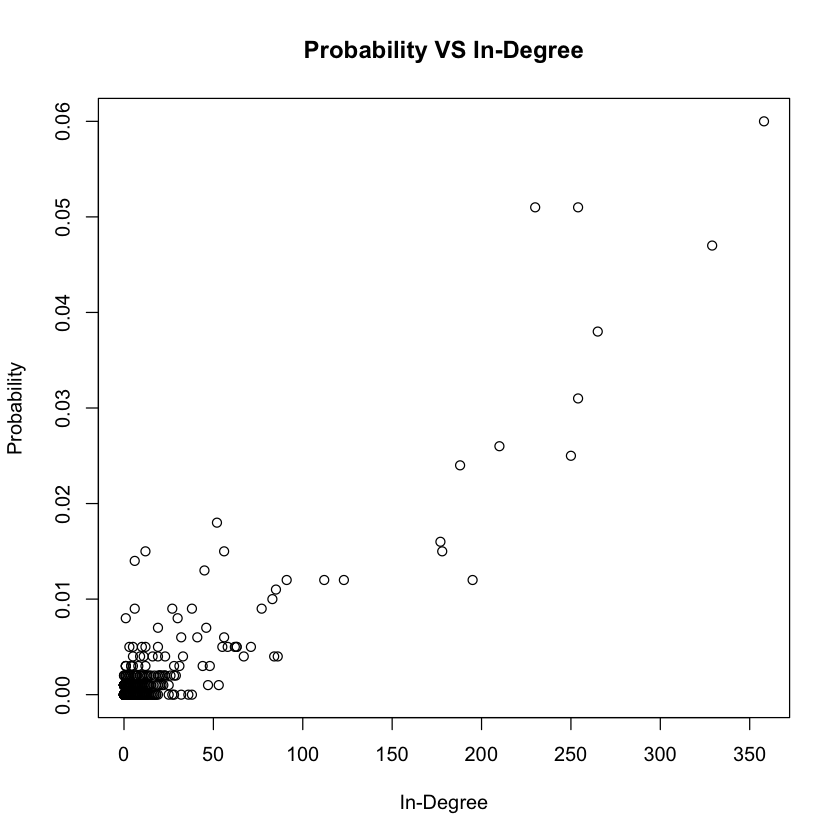

In [44]:
plot(degree(g_merge, mode = 'in'), 
     pr_end_b,
     main = 'Probability VS In-Degree',
     xlab = 'In-Degree',
     ylab = 'Probability')

### Question 4:

Personalized PageRank

While the use of PageRank has proven very effective, the web's rapid growth in size and diversity drives an increasing demand for greater flexibility in ranking. Ideally, each user should be able to define their own notion of importance for each individual query.

1. Suppose you have your own notion of importance. Your interest in a node is propor- tional to the node’s PageRank, because you totally rely upon Google to decide which website to visit (assume that these nodes represent websites). Again, use random walk on network generated in question 3 to simulate this personalized PageRank. Here the teleportation probability to each node is proportional to its PageRank (as opposed to the regular PageRank, where at teleportation, the chance of visiting all nodes are the same and equal to $\frac{1}{N}$ ). Again, let the teleportation probability be equal to $\alpha$ = 0.15. Compare the results with 3(a).

In [45]:
pr_end_4a = rep(0, 1000)
num_steps = 100
alpha = 0.15

for(start_node in 1:1000) {
    next_node = start_node
    for(i in 1:num_steps) {
        PMF = transition_matrix[start_node, ]
        rd = runif(1)
        if(rd < alpha) { # teleportation
            next_node = sample(1:vcount(g_merge), 1, prob = pr_end_b)
        } else {
            next_node = sample(1:vcount(g_merge), 1, prob = PMF)
        }
        start_node = next_node
    }
    pr_end_4a[next_node] = pr_end_4a[next_node] + 1
}

pr_end_4a = pr_end_4a / 1000

In [46]:
print(pr_end_4a)

   [1] 0.064 0.073 0.034 0.012 0.000 0.034 0.015 0.010 0.024 0.000 0.000 0.009
  [13] 0.014 0.002 0.002 0.000 0.005 0.001 0.000 0.000 0.003 0.017 0.000 0.006
  [25] 0.000 0.001 0.000 0.001 0.000 0.002 0.000 0.000 0.000 0.002 0.001 0.000
  [37] 0.000 0.021 0.000 0.000 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.001
  [49] 0.000 0.000 0.002 0.000 0.002 0.002 0.003 0.001 0.000 0.000 0.000 0.000
  [61] 0.001 0.010 0.001 0.002 0.000 0.000 0.000 0.000 0.002 0.003 0.000 0.017
  [73] 0.003 0.000 0.000 0.000 0.001 0.001 0.000 0.000 0.000 0.000 0.002 0.002
  [85] 0.000 0.000 0.000 0.000 0.001 0.002 0.000 0.000 0.001 0.000 0.002 0.000
  [97] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [109] 0.000 0.000 0.000 0.003 0.000 0.000 0.014 0.000 0.000 0.000 0.000 0.000
 [121] 0.004 0.000 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [133] 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000
 [145] 0.000 0.009 0.000 0.002 0.000 0.000 0.000 0.0

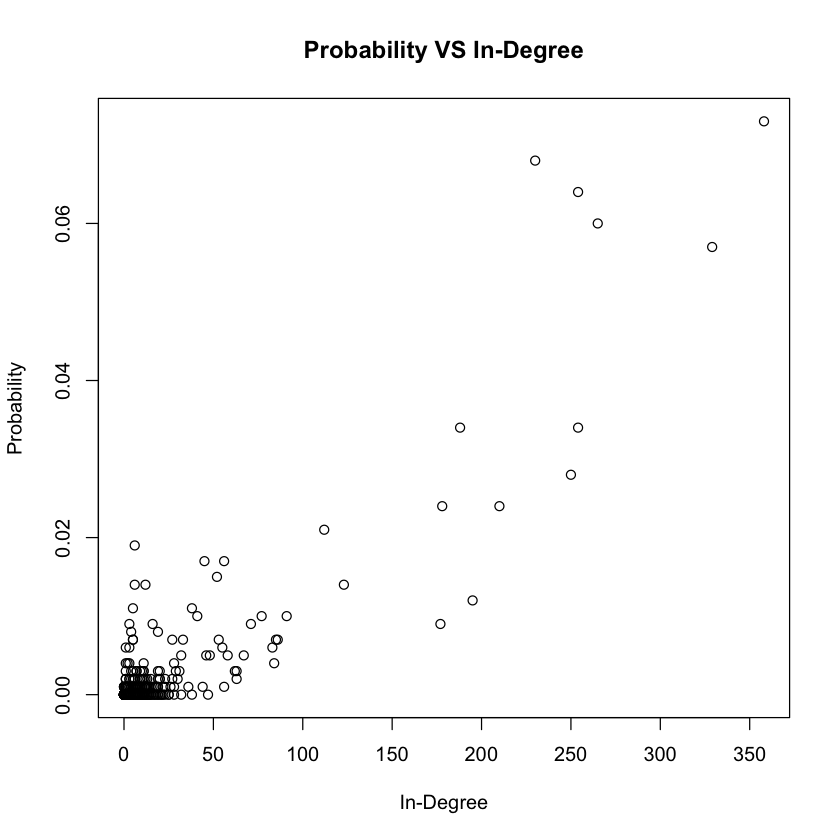

In [47]:
plot(degree(g_merge, mode = 'in'), 
     pr_end_4a,
     main = 'Probability VS In-Degree',
     xlab = 'In-Degree',
     ylab = 'Probability')

2. Find two nodes in the network with median PageRanks. Repeat part 4(a) if teleportations land only on those two nodes (with probabilities $\frac{1}{2}$, $\frac{1}{2}$). How are the PageRank values affected?

In [51]:
len = length(pr_end_b)
node1 = order(pr_end_b)[len / 2]
node2 = order(pr_end_b)[len / 2 + 1]
cat("1st node with median PageRank:", node1, "\n")
cat("2nd node with median PageRank:", node2, "\n")

1st node with median PageRank: 724 
2nd node with median PageRank: 727 


In [53]:
pr_end_4b = rep(0, 1000)
num_steps = 100
alpha = 0.15

pr_tele = rep(0, 1000)
pr_tele[node1] = 0.5
pr_tele[node2] = 0.5

for(start_node in 1:1000) {
    next_node = start_node
    for(i in 1:num_steps) {
        PMF = transition_matrix[start_node, ]
        rd = runif(1)
        if(rd < alpha) { # teleportation
            next_node = sample(1:vcount(g_merge), 1, prob = pr_tele)
        } else {
            next_node = sample(1:vcount(g_merge), 1, prob = PMF)
        }
        start_node = next_node
    }
    pr_end_4b[next_node] = pr_end_4b[next_node] + 1
}

pr_end_4b = pr_end_4b / 1000

In [54]:
print(pr_end_4b)

   [1] 0.048 0.055 0.035 0.013 0.000 0.041 0.013 0.020 0.013 0.001 0.000 0.009
  [13] 0.010 0.001 0.000 0.000 0.005 0.002 0.000 0.000 0.001 0.018 0.000 0.002
  [25] 0.000 0.000 0.000 0.000 0.005 0.000 0.000 0.000 0.000 0.001 0.000 0.001
  [37] 0.000 0.013 0.000 0.000 0.001 0.000 0.000 0.001 0.000 0.000 0.000 0.000
  [49] 0.000 0.000 0.000 0.000 0.002 0.004 0.002 0.001 0.004 0.001 0.000 0.001
  [61] 0.000 0.006 0.001 0.004 0.000 0.000 0.000 0.000 0.004 0.003 0.000 0.025
  [73] 0.013 0.000 0.000 0.000 0.000 0.001 0.003 0.000 0.000 0.000 0.002 0.000
  [85] 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.003 0.000
  [97] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000
 [109] 0.000 0.000 0.000 0.003 0.000 0.000 0.011 0.000 0.001 0.001 0.000 0.000
 [121] 0.000 0.000 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [133] 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.010 0.000 0.001 0.000 0.000 0.000 0.0

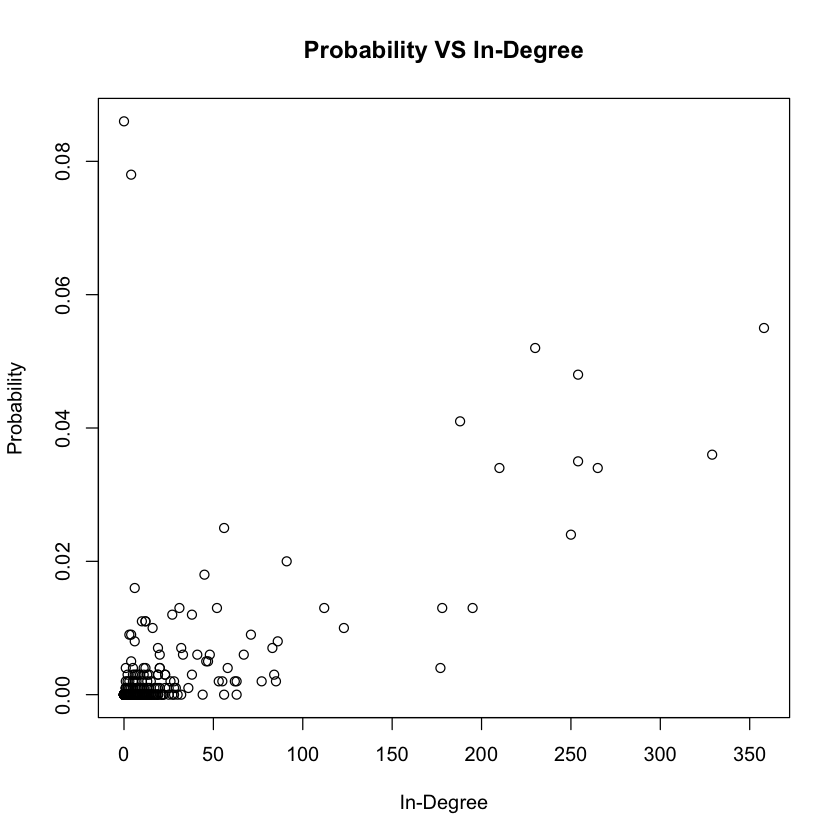

In [55]:
plot(degree(g_merge, mode = 'in'), 
     pr_end_4b,
     main = 'Probability VS In-Degree',
     xlab = 'In-Degree',
     ylab = 'Probability')